In [1]:
import numpy as np
import matplotlib.pyplot as plt; plt.rcParams['text.usetex'] = True
from fun_gilles import *

## Funciones

In [79]:
def xyeq_vs_c_ar(initial_c, initial_food,method, n_iterations, 
              reactions, food_molecules, k, V, k_var):
    equilibrium = np.zeros((len(initial_c)))
    colors = plt.cm.Spectral(np.linspace(0, 1, len(k_var)))

    for j in range(len(k_var)):
        k[1] = k_var[j] 
        
        for i in range(len(initial_c)):
            initial_food[0] = initial_c[i]
            abundances, times, V = chemistry(method, n_iterations, reactions, 
                                        food_molecules, initial_food, k, V)
            equilibrium[i] = abundances[-1, -1]/V
        
        plt.plot(initial_c/V, equilibrium, label="$k_{ar}$"+f"={k_var[j]:.1e}",
                color=colors[j], alpha=0.8)
            

    plt.grid(True, linestyle='--', alpha=0.3)
    plt.xlabel("$[C]_0$")
    plt.ylabel("$[XY]_{eq}$")

    plt.legend()
        
    plt.show()

In [97]:
def xyeq_vs_c_br(initial_c, initial_food,method, n_iterations, 
              reactions, food_molecules, k, V, k_var):
    equilibrium = np.zeros((len(initial_c)))
    colors = plt.cm.Spectral(np.linspace(0, 1, len(k_var)))

    for j in range(len(k_var)):
        k[3] = k_var[j] 
        
        for i in range(len(initial_c)):
            initial_food[0] = initial_c[i]
            abundances, times, V = chemistry(method, n_iterations, reactions, 
                                        food_molecules, initial_food, k, V)
            equilibrium[i] = abundances[-1, -1]/V[-1]
        
        plt.plot(initial_c/V[0], equilibrium, label="$k_{br}$"+f"={k_var[j]:.1e}",
                color=colors[j], alpha=0.8)
            

    plt.grid(True, linestyle='--', alpha=0.3)
    plt.xlabel("$[C]_0$")
    plt.ylabel("$[XY]_{eq}$")

    plt.legend()
        
    plt.show()

In [77]:
def xyeq_vs_k_ar(initial_c, initial_food,method, n_iterations, 
                 reactions, food_molecules, k, V, k_var):
    equilibrium = np.zeros((len(k_var)))
    colors = plt.cm.Spectral(np.linspace(0, 1, len(initial_c)))

        
    for i in range(len(initial_c)):
        initial_food[0] = initial_c[i]
        
        for j in range(len(k_var)):
            k[1] = k_var[j]
            abundances, times, V = chemistry(method, n_iterations, reactions, 
                                        food_molecules, initial_food, k, V)
            equilibrium[j] = abundances[-1, -1]/V
        
        plt.plot(k_var, equilibrium, label="$C_0$"+f"={initial_c[i]}",
                color=colors[i], alpha=0.8)
        
    plt.xscale("log")
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.xlabel("$k_{ar}$")
    plt.ylabel("$[XY]_{eq}$")

    plt.legend()
        
    plt.show()

def xyeq_vs_k_br(initial_c, initial_food,method, n_iterations, 
                 reactions, food_molecules, k, V, k_var):
    equilibrium = np.zeros((len(k_var)))
    colors = plt.cm.Spectral(np.linspace(0, 1, len(initial_c)))

        
    for i in range(len(initial_c)):
        initial_food[0] = initial_c[i]
        
        for j in range(len(k_var)):
            k[3] = k_var[j]
            abundances, times, V = chemistry(method, n_iterations, reactions, 
                                        food_molecules, initial_food, k, V)
            equilibrium[j] = abundances[-1, -1]/V
        
        plt.plot(k_var, equilibrium, label="$C_0$"+f"={initial_c[i]}",
                color=colors[i], alpha=0.8)
        
    plt.xscale("log")
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.xlabel("$k_{br}$")
    plt.ylabel("$[XY]_{eq}$")
    plt.legend()
        
    plt.show()

def time_evolution(method, n_iterations, reactions, food_molecules, initial_food, k, V):
    species = obtain_species(reactions)
    abundances, times, V = chemistry(method, n_iterations, reactions, food_molecules, 
                            initial_food, k, V)

    # Representation
    plt.figure()
    colors = plt.cm.Spectral(np.linspace(0, 1, len(species)))
    plt.grid()

    for i in range(len(species)):
        plt.plot(times, abundances[:, i], label=species[i], color=colors[i], alpha=0.9)

    plt.grid(True, linestyle='--', alpha=0.3)
    plt.xlabel("Time")
    plt.ylabel("Abundances")
    plt.legend()
    plt.title(f"{method} time evolution: k= {k}")
        
    print(f"Parameters used for simulation:\n\
    Initial concentrations:\nX_0={initial_food[1]}\nY_0={initial_food[2]}\n\
    C_0={initial_food[0]}\n\
    k_a = {k[0]}; k_a_r = {k[1]}\n\
    k_b= {k[2]}, k_b_r={k[3]}\n\
    # iterations = {n_iterations}")

    plt.show()

# Modificaciones en $k_{ar}$

Remarkably, the performance of these perfect enzymes is limited by diffusion, as indicated by the values of their second order rate constant (kcat/Km) which are comparable to the rate constant for the diffusional encounter of spherical particles, i.e. 1010 M−1s−1.

https://www.sciencedirect.com/science/article/pii/S0006291X25001500

## Con $k_{br}=0$

In [5]:
file = "reactions_XYC.txt" # M reactions
method = "Deterministic" # Gillespie or Deterministic

# condiciones iniciales
food_molecules = 3

# obtener reacciones y especies:
reactions = read_file(file)
species = obtain_species(reactions)

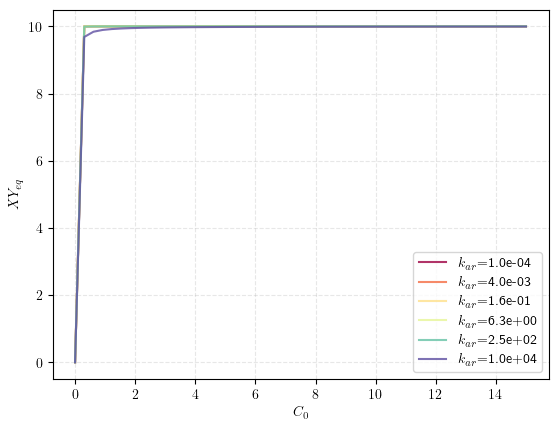

Parameters used for simulation:
Initial concentrations:
X_0=10
Y_0=10
k_a = 1; k_a_r = [1.00000000e-04 3.98107171e-03 1.58489319e-01 6.30957344e+00
 2.51188643e+02 1.00000000e+04]
k_b= 1, k_b_r=0
# iterations = 100000


In [6]:
# Reaction constants:
k = [1,0,1,0] # len(k)= # de reacciones
# Volume:
V = 1
initial_food = [0,10,10] # initial molecules number
initial_c = (np.linspace(0,15,50))
k_var = np.logspace(-4, 4, 6)
n_iterations = 100000

xyeq_vs_c_ar(initial_c, initial_food, method, n_iterations, reactions,
          food_molecules, k, V, k_var)

print(f"Parameters used for simulation:\n\
Initial concentrations:\nX_0={initial_food[1]}\nY_0={initial_food[2]}\n\
k_a = {k[0]}; k_a_r = {k_var}\n\
k_b= {k[2]}, k_b_r={k[3]}\n\
# iterations = {n_iterations}")

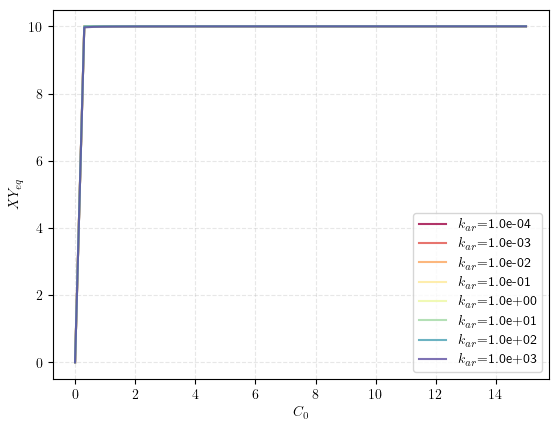

Parameters used for simulation:
Initial concentrations:
X_0=10
Y_0=10
k_a = 1; k_a_r = [1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
k_b= 1, k_b_r=0
# iterations = 100000000


In [19]:
# Reaction constants:
k = [1,0,1,0] # len(k)= # de reacciones
# Volume:
V = 10
initial_food = [0,10,10] # initial molecules number
initial_c = (np.linspace(0,15,50))
k_var = np.logspace(-4, 3, 8)
n_iterations = 100000000

xyeq_vs_c_ar(initial_c, initial_food, method, n_iterations, reactions,
          food_molecules, k, V, k_var)

print(f"Parameters used for simulation:\n\
Initial concentrations:\nX_0={initial_food[1]}\nY_0={initial_food[2]}\n\
k_a = {k[0]}; k_a_r = {k_var}\n\
k_b= {k[2]}, k_b_r={k[3]}\n\
# iterations = {n_iterations}")

Parameters used for simulation:
    Initial concentrations:
X_0=10
Y_0=10
    C_0=1
    k_a = 1; k_a_r = 1
    k_b= 1, k_b_r=0
    # iterations = 19000


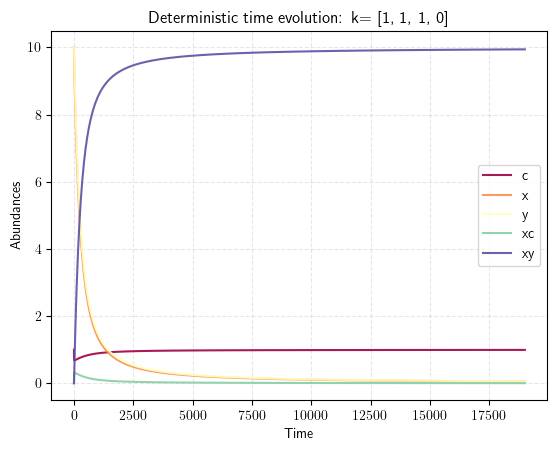

In [8]:
k = [1,1,1,0] # len(k)= # de reacciones
# Volume:
V = 10

# condiciones iniciales
initial_food = [1,10,10] # initial molecules number
food_molecules = 3
n_iterations = 19000

time_evolution(method, n_iterations, reactions, food_molecules, initial_food,
               k, V)

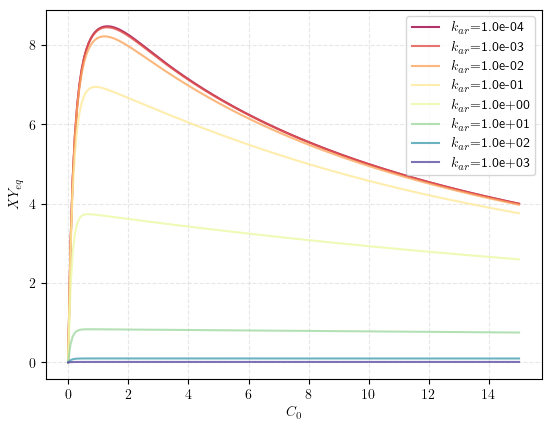

Parameters used for simulation:
Initial concentrations:
X_0=10
Y_0=10
k_a = 1; k_a_r = [1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
k_b= 1, k_b_r=1
# iterations = 1000


In [47]:
# Reaction constants:
k = [1,0,1,1] # len(k)= # de reacciones
# Volume:
V = 10
initial_food = [0,10,10] # initial molecules number
initial_c = (np.linspace(0,15,200))
k_var = np.logspace(-4, 3, 8)
n_iterations = 1000

xyeq_vs_c_ar(initial_c, initial_food, method, n_iterations, reactions,
          food_molecules, k, V, k_var)

print(f"Parameters used for simulation:\n\
Initial concentrations:\nX_0={initial_food[1]}\nY_0={initial_food[2]}\n\
k_a = {k[0]}; k_a_r = {k_var}\n\
k_b= {k[2]}, k_b_r={k[3]}\n\
# iterations = {n_iterations}")

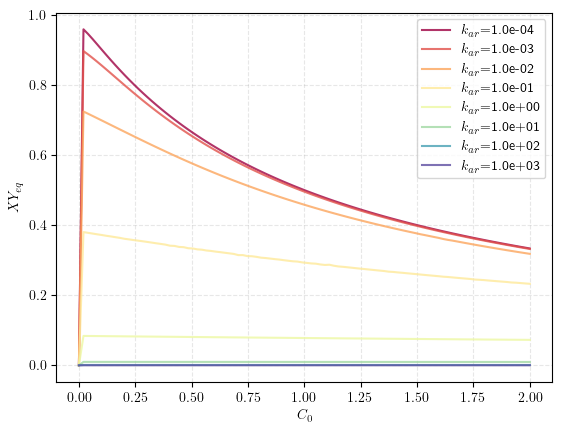

Parameters used for simulation:
Initial concentrations:
X_0=1
Y_0=1
k_a = 1; k_a_r = [1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
k_b= 1, k_b_r=1
# iterations = 100000000


In [46]:
# Reaction constants:
k = [1,0,1,1] # len(k)= # de reacciones
# Volume:
V = 10
initial_food = [0,1,1] # initial molecules number
initial_c = (np.linspace(0,2,100))
k_var = np.logspace(-4, 3, 8)
n_iterations = 100000000

xyeq_vs_c_ar(initial_c, initial_food, method, n_iterations, reactions,
          food_molecules, k, V, k_var)

print(f"Parameters used for simulation:\n\
Initial concentrations:\nX_0={initial_food[1]}\nY_0={initial_food[2]}\n\
k_a = {k[0]}; k_a_r = {k_var}\n\
k_b= {k[2]}, k_b_r={k[3]}\n\
# iterations = {n_iterations}")

Parameters used for simulation:
    Initial concentrations:
X_0=10
Y_0=10
    C_0=0.001
    k_a = 1; k_a_r = 0.0001
    k_b= 1, k_b_r=1
    # iterations = 100000000


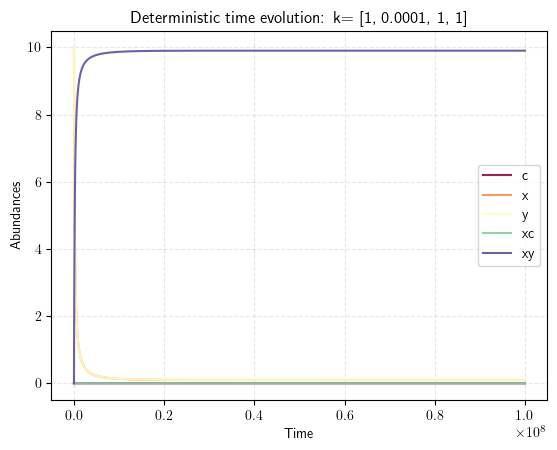

In [62]:
# Reaction constants:
k = [1,1e-4,1,1] # len(k)= # de reacciones
# Volume:
V = 10
initial_food = [0.001,10,10] # initial molecules number
n_iterations = 100000000
time_evolution(method, n_iterations, reactions, food_molecules, initial_food,
                k, V)

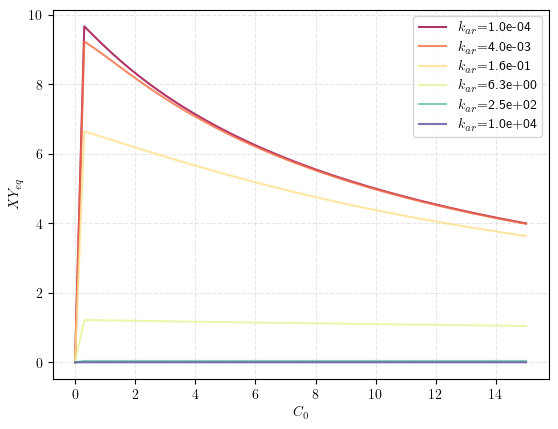

Parameters used for simulation:
Initial concentrations:
X_0=10
Y_0=10
k_a = 1; k_a_r = [1.00000000e-04 3.98107171e-03 1.58489319e-01 6.30957344e+00
 2.51188643e+02 1.00000000e+04]
k_b= 1, k_b_r=1
# iterations = 100000000


In [12]:
# Reaction constants:
k = [1,0,1,1] # len(k)= # de reacciones
# Volume:
V = 10
initial_food = [0,10,10] # initial molecules number
initial_c = (np.linspace(0,15,50))
k_var = np.logspace(-4, 4, 6)
n_iterations = 100000000

xyeq_vs_c_ar(initial_c, initial_food, method, n_iterations, reactions,
          food_molecules, k, V, k_var)

print(f"Parameters used for simulation:\n\
Initial concentrations:\nX_0={initial_food[1]}\nY_0={initial_food[2]}\n\
k_a = {k[0]}; k_a_r = {k_var}\n\
k_b= {k[2]}, k_b_r={k[3]}\n\
# iterations = {n_iterations}")

Parameters used for simulation:
    Initial concentrations:
X_0=1000
Y_0=1000
    C_0=100
    k_a = 1; k_a_r = 0.001
    k_b= 1, k_b_r=1
    # iterations = 100000


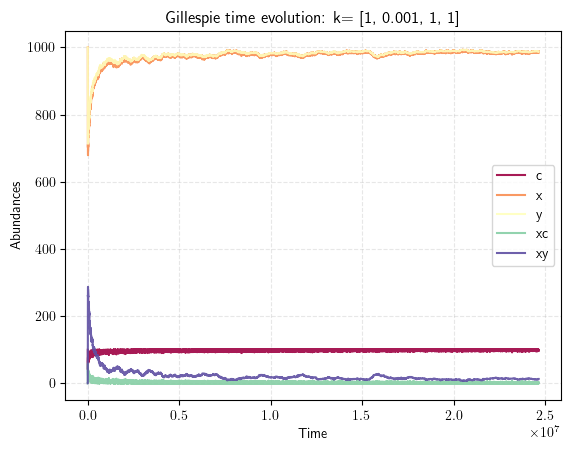

In [75]:
# Reaction constants:
k = [1,1e-3,1,1] # len(k)= # de reacciones
# Volume:
V = 1000
initial_food = [100,1000,1000] # initial molecules number
initial_c = (np.linspace(0,15,50))
k_var = np.logspace(-4, 4, 6)
n_iterations = 100000
method = "Gillespie"
time_evolution(method, n_iterations, reactions, food_molecules, initial_food, k, V)

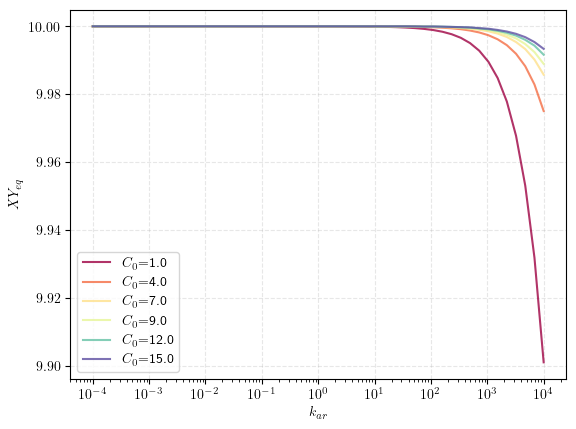

In [13]:
# Reaction constants:
k = [1,0,1,0] # len(k)= # de reacciones
# Volume:
V = 10
initial_food = [0,10,10]

# Different values for initial C concentration and k_var:
initial_c = np.round(np.linspace(1,15,6))
k_var = np.logspace(-4, 4, 50)
n_iterations = 100000000

xyeq_vs_k_ar(initial_c, initial_food, method, 
             n_iterations, reactions, food_molecules, k, V, k_var)


## sale así porque a k muy alta no llega al equilibrio !!!

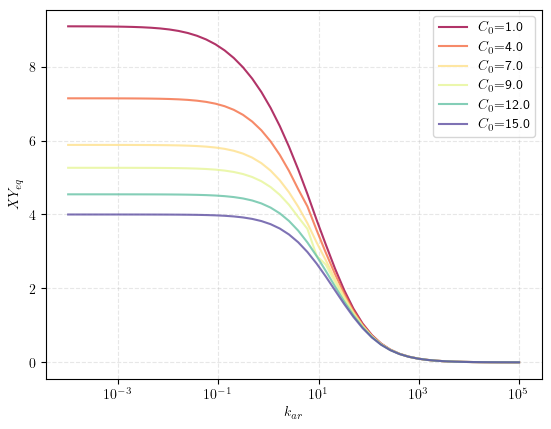

In [14]:
# Reaction constants:
k = [1,0,1,1] # len(k)= # de reacciones
# Volume:
V = 1

# condiciones iniciales
initial_food = [0,10,10] # initial molecules number
food_molecules = 3

# Different values for initial C concentration and k_var:
initial_c = np.round(np.linspace(1,15,6))
k_var = np.logspace(-4, 5, 50)
n_iterations = 100000

xyeq_vs_k_ar(initial_c, initial_food, method, 
             n_iterations, reactions, food_molecules, k, V, k_var)

# Modificaciones en $k_{br}$

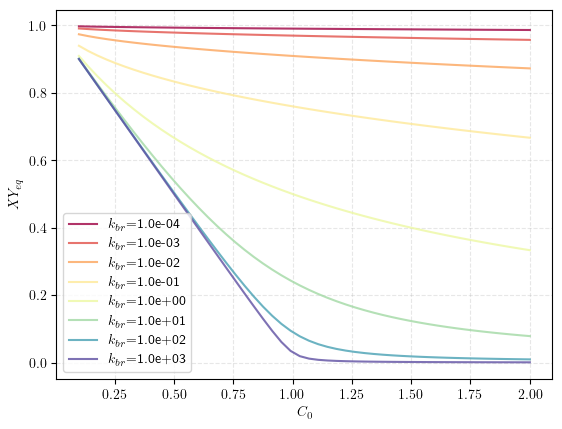

Parameters used for simulation:
Initial concentrations:
X_0=1
Y_0=1
k_a = 1; k_a_r = 0
k_b= 1, k_b_r=[1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
# iterations = 100000000


In [ ]:
# Reaction constants:
k = [1,0,1,1] # len(k)= # de reacciones
# Volume:
V = 10
initial_food = [0,10,10] # initial molecules number
initial_c = (np.linspace(0,15,50))
k_var = np.logspace(-4, 3, 8)
n_iterations = 10000000

xyeq_vs_c_br(initial_c, initial_food, method, n_iterations, reactions,
          food_molecules, k, V, k_var)

print(f"Parameters used for simulation:\n\
Initial concentrations:\nX_0={initial_food[1]}\nY_0={initial_food[2]}\n\
k_a = {k[0]}; k_a_r = {k[1]}\n\
k_b= {k[2]}, k_b_r={k_var}\n\
# iterations = {n_iterations}")

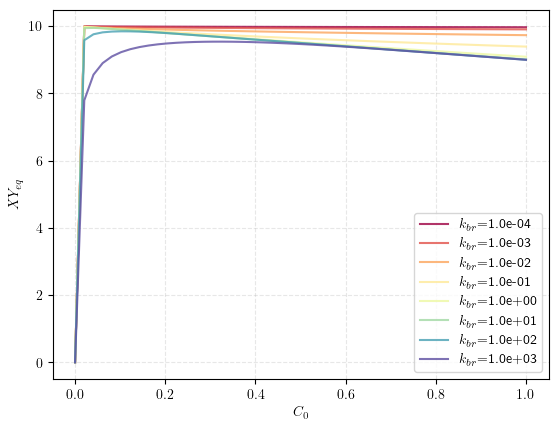

Parameters used for simulation:
Initial concentrations:
X_0=10
Y_0=10
k_a = 1; k_a_r = 0
k_b= 1, k_b_r=[1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
# iterations = 10000000


In [15]:
# Reaction constants:
k = [1,0,1,1] # len(k)= # de reacciones
# Volume:
V = 10
initial_food = [0,10,10] # initial molecules number
initial_c = (np.linspace(0,1,50))
k_var = np.logspace(-4, 3, 8)
n_iterations = 10000000

xyeq_vs_c_br(initial_c, initial_food, method, n_iterations, reactions,
          food_molecules, k, V, k_var)

print(f"Parameters used for simulation:\n\
Initial concentrations:\nX_0={initial_food[1]}\nY_0={initial_food[2]}\n\
k_a = {k[0]}; k_a_r = {k[1]}\n\
k_b= {k[2]}, k_b_r={k_var}\n\
# iterations = {n_iterations}")

In [100]:
# Reaction constants:
k = [1,0,1,1] # len(k)= # de reacciones
# Volume:
V = 1000
initial_food = [0,1000,1000] # initial molecules number
initial_c = (np.linspace(1,250,25))
k_var = [1e-2,1]
n_iterations = 100000
method = "Gillespie"

equilibrium = np.zeros((len(initial_c)))
colors = plt.cm.Spectral(np.linspace(0, 1, len(k_var)))

for j in range(len(k_var)):
    k[3] = k_var[j] 
    
    for i in range(len(initial_c)):
        initial_food[0] = initial_c[i]
        abundances, times, V = chemistry(method, n_iterations, reactions, 
                                    food_molecules, initial_food, k, V)
        equilibrium[i] = abundances[-1, -1]/V[-1]
    
    plt.plot(initial_c/V[0], equilibrium, label="$k_{br}$"+f"={k_var[j]:.1e}",
            color=colors[j], alpha=0.8)
        

plt.grid(True, linestyle='--', alpha=0.3)
plt.xlabel("$[C]_0$")
plt.ylabel("$[XY]_{eq}$")

plt.legend()
    
plt.show()


print(f"Parameters used for simulation:\n\
Initial concentrations:\nX_0={initial_food[1]}\nY_0={initial_food[2]}\n\
k_a = {k[0]}; k_a_r = {k_var}\n\
k_b= {k[2]}, k_b_r={k[3]}\n\
# iterations = {n_iterations}")

C:\Users\cvzad\AppData\Local\Temp\ipykernel_34632\3821120785.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  equilibrium[i] = abundances[-1, -1]/V[-1]


ValueError: setting an array element with a sequence.

Parameters used for simulation:
    Initial concentrations:
X_0=10
Y_0=10
    C_0=6
    k_a = 1; k_a_r = 0
    k_b= 1, k_b_r=1
    # iterations = 700


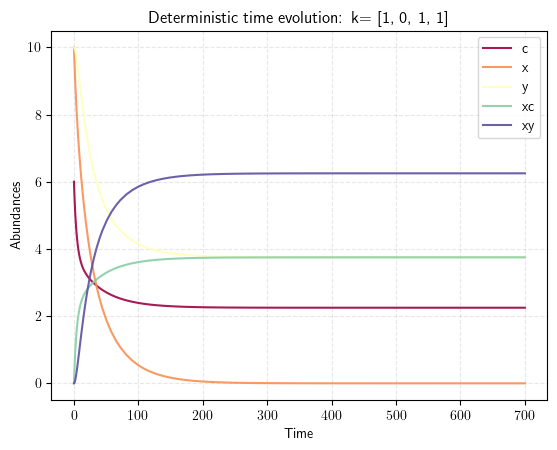

In [23]:
k = [1,0,1,1] # len(k)= # de reacciones
# Volume:
V = 10

# condiciones iniciales
initial_food = [6,10,10] # initial molecules number
food_molecules = 3
n_iterations = 700

time_evolution(method, n_iterations, reactions, food_molecules, initial_food,
               k, V)

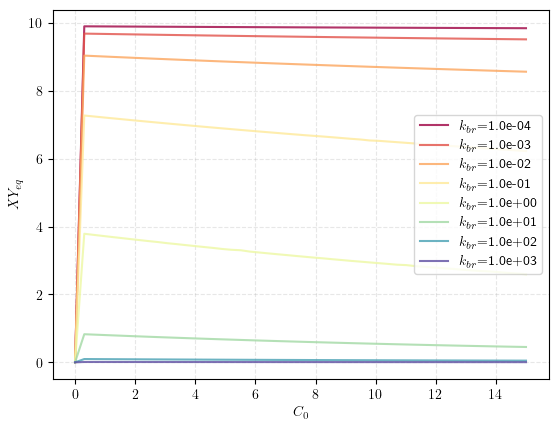

Parameters used for simulation:
Initial concentrations:
X_0=10
Y_0=10
k_a = 1; k_a_r = 1
k_b= 1, k_b_r=[1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
# iterations = 1000000


In [24]:
# Reaction constants:
k = [1,1,1,1] # len(k)= # de reacciones
# Volume:
V = 10
initial_food = [0,10,10] # initial molecules number
initial_c = (np.linspace(0,15,50))
k_var = np.logspace(-4, 3, 8)
n_iterations = 1000000

xyeq_vs_c_br(initial_c, initial_food, method, n_iterations, reactions,
          food_molecules, k, V, k_var)

print(f"Parameters used for simulation:\n\
Initial concentrations:\nX_0={initial_food[1]}\nY_0={initial_food[2]}\n\
k_a = {k[0]}; k_a_r = {k[1]}\n\
k_b= {k[2]}, k_b_r={k_var}\n\
# iterations = {n_iterations}")

Parameters used for simulation:
    Initial concentrations:
X_0=10
Y_0=10
    C_0=4
    k_a = 1; k_a_r = 1
    k_b= 1, k_b_r=1
    # iterations = 500


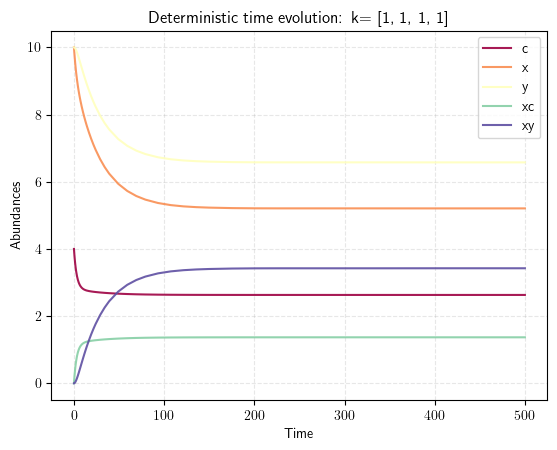

In [25]:
k = [1,1,1,1] # len(k)= # de reacciones
# Volume:
V = 10

# condiciones iniciales
initial_food = [4,10,10] # initial molecules number
food_molecules = 3
n_iterations = 500

time_evolution(method, n_iterations, reactions, food_molecules, initial_food,
               k, V)

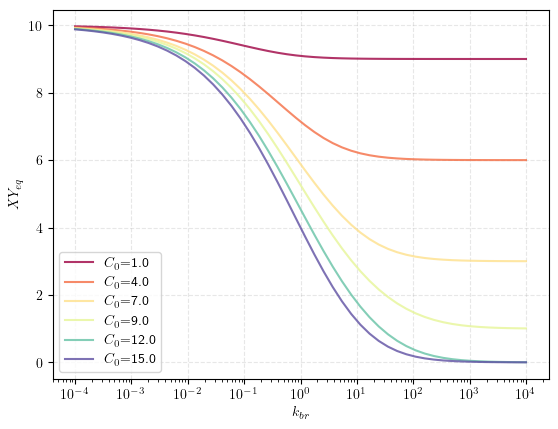

In [37]:
# Reaction constants:
k = [1,0,1,0] # len(k)= # de reacciones
# Volume:
V = 10
initial_food = [0,10,10]

# Different values for initial C concentration and k_var:
initial_c = np.round(np.linspace(1,15,6))
k_var = np.logspace(-4, 4, 50)
n_iterations = 1000000000

xyeq_vs_k_br(initial_c, initial_food, method, 
             n_iterations, reactions, food_molecules, k, V, k_var)

Parameters used for simulation:
    Initial concentrations:
X_0=10
Y_0=10
    C_0=1
    k_a = 1; k_a_r = 0
    k_b= 1, k_b_r=10000.0
    # iterations = 1000000


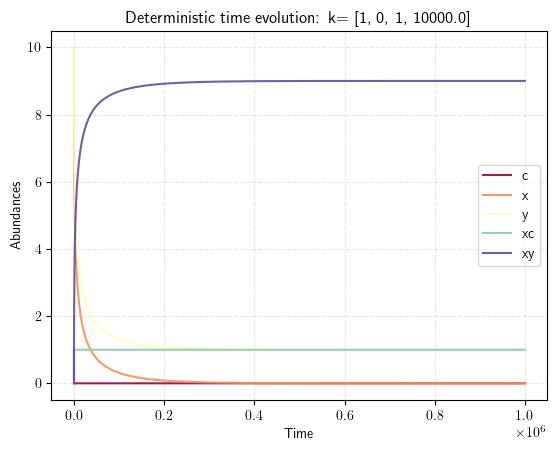

In [51]:
k = [1,0,1,1e4] # len(k)= # de reacciones
# Volume:
V = 1

# condiciones iniciales
initial_food = [1,10,10] # initial molecules number
food_molecules = 3
n_iterations = 1000000

time_evolution(method, n_iterations, reactions, food_molecules, initial_food,
               k, V)

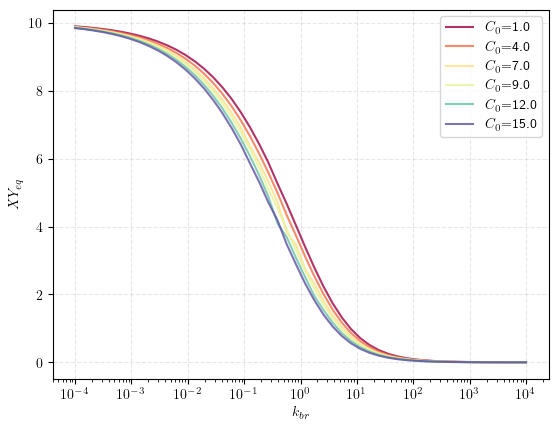

In [88]:
# Reaction constants:
k = [1,1,1,0] # len(k)= # de reacciones
# Volume:
V = 10
initial_food = [0,10,10]

# Different values for initial C concentration and k_var:
initial_c = np.round(np.linspace(1,15,6))
k_var = np.logspace(-4, 4, 50)
n_iterations = 100000000

xyeq_vs_k_br(initial_c, initial_food, method, 
             n_iterations, reactions, food_molecules, k, V, k_var)

Parameters used for simulation:
    Initial concentrations:
X_0=10
Y_0=10
    C_0=1
    k_a = 1; k_a_r = 1
    k_b= 1, k_b_r=1
    # iterations = 1000


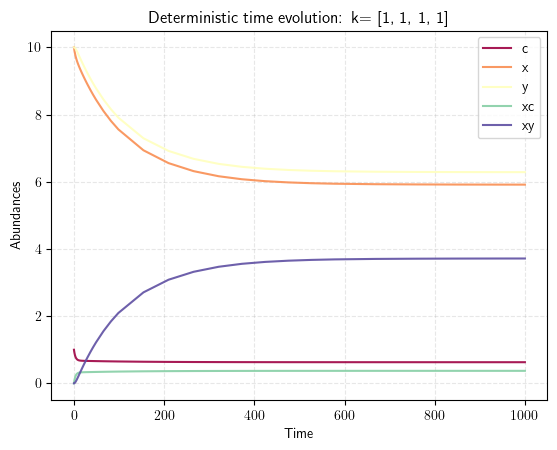

In [58]:
k = [1,1,1,1] # len(k)= # de reacciones
# Volume:
V = 10

# condiciones iniciales
initial_food = [1,10,10] # initial molecules number
food_molecules = 3
n_iterations = 1000

time_evolution(method, n_iterations, reactions, food_molecules, initial_food,
               k, V)

Parameters used for simulation:
    Initial concentrations:
X_0=1000
Y_0=1000
    C_0=200
    k_a = 1; k_a_r = 1
    k_b= 1, k_b_r=1
    # iterations = 10000


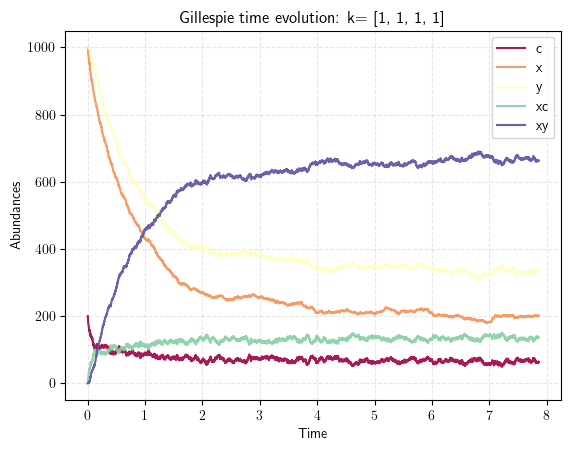

In [99]:
k = [1,1,1,1] # len(k)= # de reacciones
# Volume:
V = 100
# condiciones iniciales
initial_food = [200,1000,1000] # initial molecules number
food_molecules = 3
n_iterations = 10000
method = "Gillespie"

time_evolution(method, n_iterations, reactions, food_molecules, initial_food,
               k, V)